# Lectures 3-4 — Gene regulation

*6th November 2025* - **Credits:** Luca Ciandrini (luca.ciandrini@umontpellier.fr)

---

## aims
- Being able to discuss and present the principles of Gene Expression regulation (mainly at the level of transcription)
- Describe the parameters of the different models and explain how to change them experimentally
- Understand the effects of the simplest GRN: positive and negative autoregulation
- Being able to explain the differences of extrinsic and intrinsic noise


### 1-resources
- Uri Alon, An introduction to systems biology, 2nd Ed. - Ch1 and Ch2 - Appendix A
- Rob Phillips et al., Physical biology of the cell, 2nd Ed. - pages 244-248


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import os

### Gene regulation

### Hill function: Activator

rate of production $Y = f(X*) = \cfrac{X^{*n}}{K^n + X^{*n}} $.

Text(0, 0.5, 'prod rate [1/s]')

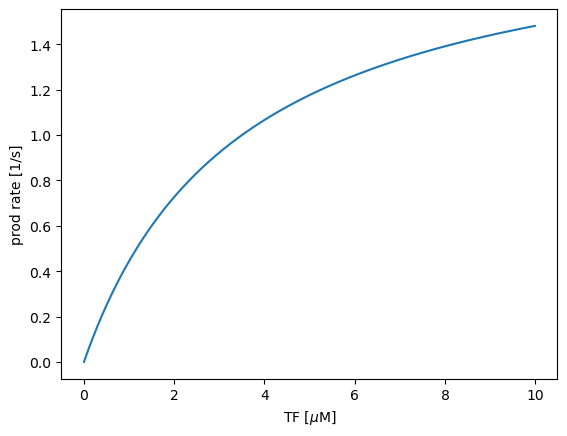

In [9]:
TF = np.arange(0,10,0.01)

beta = 2.
K = 3.5 
n = 1

f_act = beta * np.power(TF,n) /(np.power(K,n) + np.power(TF,n))

plt.plot(TF, f_act)

plt.xlabel(r'TF [$\mu$M]')
plt.ylabel(r'prod rate [1/s]')

Text(0.5, 1.0, 'Activator for different values of $n$')

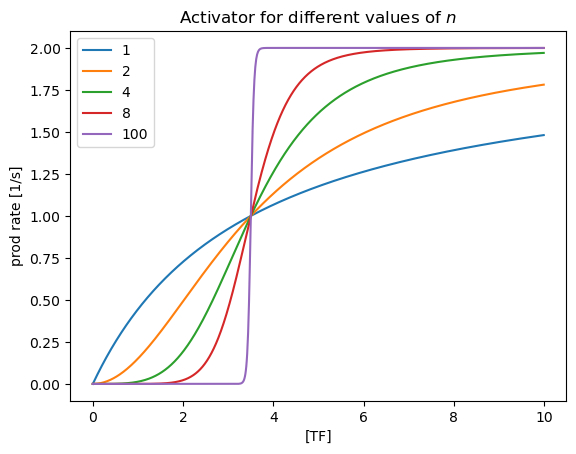

In [10]:
n_list = [1,2,4,8,100]

for n in n_list:
    f_act = beta * np.power(TF,n) /(np.power(K,n) + np.power(TF,n))
    plt.plot(TF, f_act, label = n)

plt.legend()
plt.xlabel('[TF]')
plt.ylabel('prod rate [1/s]')

plt.title(r'Activator for different values of $n$')

#### Repressor

Text(0, 0.5, 'prod rate [1/s]')

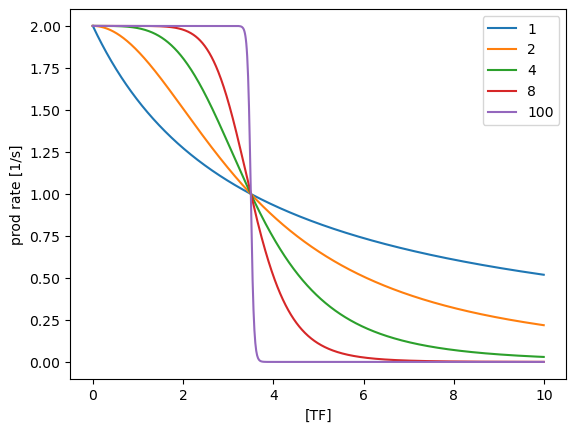

In [5]:
n_list = [1,2,4,8,100]

for n in n_list:
    f_rep = beta * 1./(1. + np.power(TF/K,n))
    plt.plot(TF, f_rep, label = n)

plt.legend()
plt.xlabel('[TF]')
plt.ylabel('prod rate [1/s]')
#

## Autoregulation

- Network motif
- Randomised networks
![image.png](./data/net.png)

Let's have a look at real data.

### Negative Auto Regulation
Negative Auto-Regulation (NAR) is the simplest network motif found in gene regulatory networks (GRN).

Below we import the gene transcription regulatory network for *E. coli* downloaded from [this page](https://www.weizmann.ac.il/mcb/UriAlon/e-coli-transcription-network) (Version 1.1).


In [11]:
import networkx as nx
import pandas as pd

import urllib.request  # library handling URLs
from pylab import *

network = nx.DiGraph()

# E. coli network file

file = open("./data/coliInterFullVec.txt")
#data = file.read()
data = loadtxt(file)
#print(data)
file.close()

operons = data[:,0]
TFs = data[:,1]
regulations = data[:,2]

NAR = []
NARnodes = []
for tf, op, reg in zip(TFs, operons, regulations):
    network.add_edge(tf, op)
    if tf == op and reg == 2:
        NAR.append((tf,tf))
        NARnodes.append(tf)
        

#print(network.edges())

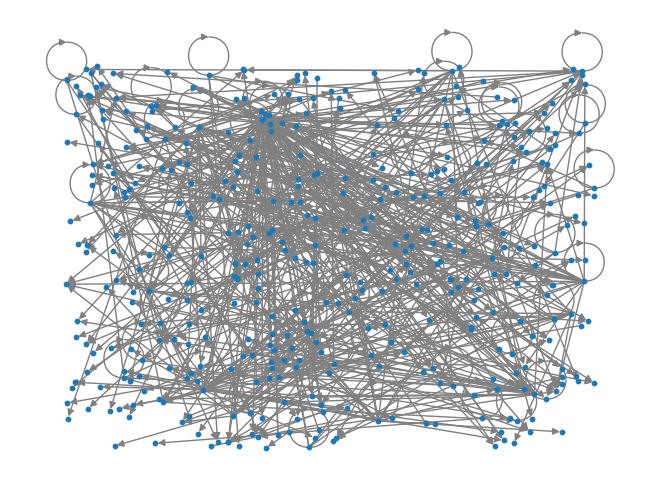

In [12]:
nx.draw_random(network,with_labels=False, node_size = 10, edge_color='gray')

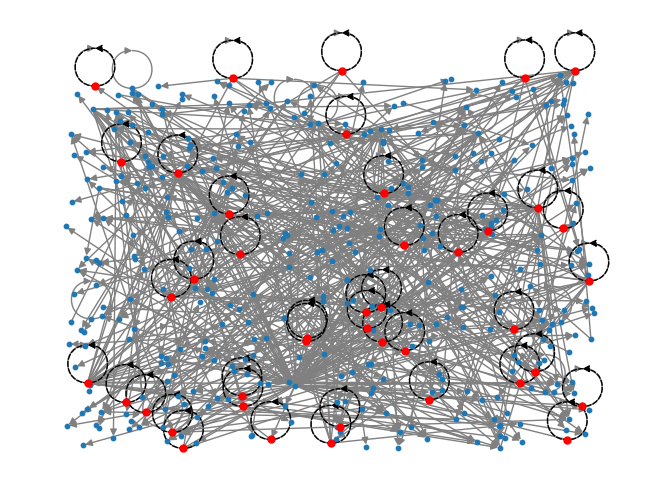

In [3]:
pos = nx.random_layout(network);
nx.draw(network,pos, with_labels=False, node_size = 10, edge_color='gray')
nx.draw_networkx_edges(network, pos, edgelist=NAR, arrowstyle="<|-", style="dashed")
nx.draw_networkx_nodes(network, pos, nodelist=NARnodes, node_color="red",node_size = 25)

In [14]:
len(NAR)

42

In [13]:
# No. of connections
A = network.number_of_edges()
print('A = ', A)

# Population of Nodes
N = network.number_of_nodes()
print('N = ', N)

Theoretical_NAR = A/N
print(Theoretical_NAR)

std = np.sqrt(A/N)
print(std)

A =  578
N =  423
1.3664302600472813
1.1689440790932992


**Why is NAR a network motif?** i.e., is there an advantage in having a NAR?

Let's start with the **rate plot** of a constitutive gene, in which we plot the rate of production and degradation of a protein $X$.

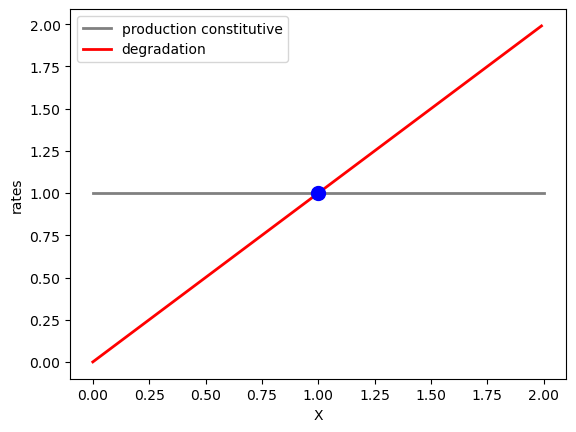

In [7]:
beta = 1  #production rate
alpha = 1 #degradation rate constant

X = np.arange(0,2,0.01)

plt.plot([0,2], [beta,beta], linewidth = 2, color = 'gray', label = 'production constitutive')
plt.plot(X, alpha*X, linewidth = 2, color = 'red', label = 'degradation')
plt.plot([beta/alpha],[beta],'o', color='blue', ms=10)

plt.xlabel('X')
plt.ylabel('rates')

plt.legend()

Now we do the same with a NAR...

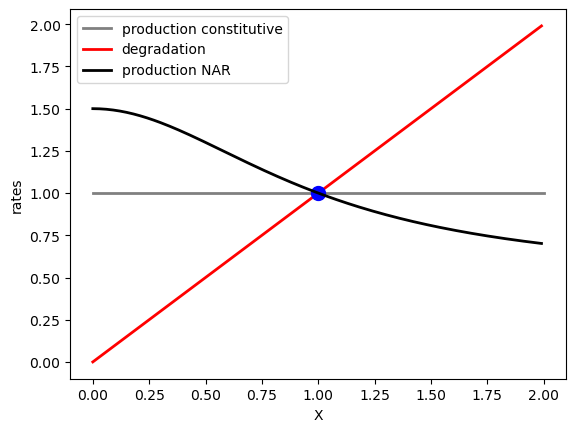

In [8]:
beta = 1  #production rate
alpha = 1 #degradation rate constant

X = np.arange(0,2,0.01)

K = beta/alpha
f = beta/2 + beta * 1./(1. + np.power(X/K,2))

plt.plot([0,2], [beta,beta], linewidth = 2, color = 'gray', label = 'production constitutive')
plt.plot(X, alpha*X, linewidth = 2, color = 'red', label = 'degradation')
plt.plot([beta/alpha],[beta],'o', color='blue', ms=10)

plt.plot(X, f, linewidth = 2, color = 'black', label = 'production NAR')


plt.xlabel('X')
plt.ylabel('rates')

plt.legend()

discuss it...

## Noise and Robustness

- Introduce the concept of noise and robustness
- What is the difference between intrinsic and extrinsic noise?

We are going to go through: *Engineering stability in gene networks by autoregulation*, Attila Becskei & Luis Serrano, Nature (2000); *Stochastic Gene Expression in a Single Cell*, Michael B. Elowitz, Arnold J. Levine, Eric D. Siggia, Peter S. Swain, Science (2002)

---